# Data Engineering Concept MiniProject

## Panel G Batch G1

## 1. Anish Ranjan        PG-03
## 2. Lavanya Singh       PG-20
## 3. Saurabh Advani      PG-25
## 4. Malay Jignesh Shah  PG-26

In [42]:
import numpy as np
import pandas as pd

In [43]:
movies_data = pd.read_csv("C:\\Users\\malay\\OneDrive\\Desktop\\Ma-Sa-La\\201811.csv")

In [44]:
movies_data.head(100)

,Unnamed: 0,Title,listeritemindex,Year,certificate,Time,genre,genre1,genre2,inlineblock,Score,summary,director1,director2,cast1,cast2,cast3,cast4,number of votes,gross revenue
0,0,The Nun,1,-2018,R,96 min,Horror,Mystery,Thriller,5.3,\n46 \n Metascore\n,A priest with a haunted past and a novice on t...,Director:Corin Hardy | ...,Corin Hardy,Demián Bichir,Taissa Farmiga,Jonas Bloquet,Bonnie Aarons,"1,60,674",$117.45M
1,1,The Meg,2,-2018,PG-13,113 min,Action,Horror,Sci-Fi,5.6,\n46 \n Metascore\n,A group of scientists exploring the Marianas T...,Director:Jon Turteltaub | ...,Jon Turteltaub,Jason Statham,Bingbing Li,Rainn Wilson,Cliff Curtis,"1,99,450",$143.01M
2,2,Hereditary,3,-2018,R,127 min,Drama,Horror,Mystery,7.3,\n87 \n Metascore\n,A grieving family is haunted by tragic and dis...,Director:Ari Aster | S...,Ari Aster,Toni Collette,Milly Shapiro,Gabriel Byrne,Alex Wolff,"3,56,081",$44.07M
3,3,The Equalizer 2,4,-2018,R,121 min,Action,Crime,Thriller,6.7,\n50 \n Metascore\n,Robert McCall serves an unflinching justice fo...,Director:Antoine Fuqua | ...,Antoine Fuqua,Denzel Washington,Pedro Pascal,Ashton Sanders,Orson Bean,"1,81,842",$102.08M
4,4,Halloween,5,(I) (2018),R,106 min,Crime,Horror,Thriller,6.5,\n67 \n Metascore\n,"Laurie Strode confronts her long-time foe, Mic...",Director:David Gordon Green ...,David Gordon Green,Jamie Lee Curtis,Judy Greer,Andi Matichak,James Jude Courtney,"1,63,920",$159.34M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Malevolent,96,(III) (2018),TV-MA,89 min,Horror,Mystery,Thriller,4.8,NaN,A team of scam artists get more than they barg...,Director:Olaf de Fleur Johannesson ...,Olaf de Fleur Johannesson,Florence Pugh,Ben Lloyd-Hughes,Scott Chambers,Georgina Bevan,"16,268",NaN
96,96,The Matchmaker's Playbook,97,-2018,NaN,89 min,Comedy,Romance,NaN,6.2,NaN,"After a career-ending accident, former NFL rec...",Director:Tosca Musk | ...,Tosca Musk,Nick Bateman,Caitlin Carver,Tyler Johnson,Justene Alpert,"2,160",NaN
97,97,Mary Queen of Scots,98,-2018,R,124 min,Biography,Drama,History,6.3,\n60 \n Metascore\n,Mary Stuart's (Saoirse Ronan's) attempt to ove...,Director:Josie Rourke | ...,Josie Rourke,Saoirse Ronan,Margot Robbie,Jack Lowden,Joe Alwyn,"53,785",$16.47M
98,98,Possum,99,-2018,NaN,85 min,Drama,Horror,Mystery,5.8,\n64 \n Metascore\n,"After returning to his childhood home, a disgr...",Director:Matthew Holness |...,Matthew Holness,Sean Harris,Alun Armstrong,Andy Blithe,Ryan Enever,"8,210",NaN


# Data Cleaning

In [45]:
columns_to_drop = ['Unnamed: 0', 'listeritemindex', 'Year','certificate', 'Time', 'Score', 'summary', 'director1', 'director2', 'cast1', 'cast2', 'cast3','cast4','number of votes','gross revenue','genre1','genre2']

movies_data.drop(columns=columns_to_drop, inplace=True)

In [46]:
movies_data.head(100)

,Title,genre,inlineblock
0,The Nun,Horror,5.3
1,The Meg,Action,5.6
2,Hereditary,Drama,7.3
3,The Equalizer 2,Action,6.7
4,Halloween,Crime,6.5
...,...,...,...
95,Malevolent,Horror,4.8
96,The Matchmaker's Playbook,Comedy,6.2
97,Mary Queen of Scots,Biography,6.3
98,Possum,Drama,5.8


In [47]:
movies_data.tail(100)

,Title,genre,inlineblock
9200,Detective Dee: Beauty from the West,Action,NaN
9201,Something Inside Is Broken,Musical,NaN
9202,Future Chase,Action,NaN
9203,Thin Line,Drama,NaN
9204,The Right Path,Drama,NaN
...,...,...,...
9295,No maku bakuhai to,Drama,NaN
9296,The 6th Kiss,Comedy,NaN
9297,Alibaba Aur 41 Chor,Animation,NaN
9298,Strong Artificial Intelligence,Action,7.2


In [48]:
columns_to_rename = {
    'Title': 'movie_name',
    'inlineblock': 'imdb_rating'
}

movies_data.rename(columns=columns_to_rename, inplace=True)

In [49]:
movies_data['imdb_rating'].isnull().sum()

1987

In [50]:
movies_data.head()

,movie_name,genre,imdb_rating
0,The Nun,Horror,5.3
1,The Meg,Action,5.6
2,Hereditary,Drama,7.3
3,The Equalizer 2,Action,6.7
4,Halloween,Crime,6.5


In [51]:
movies_data['genre'].isnull

<bound method Series.isnull of 0                      Horror
1                      Action
2                       Drama
3                      Action
4                       Crime
                ...          
9295        Drama            
9296                   Comedy
9297    Animation            
9298                   Action
9299                   Comedy
Name: genre, Length: 9300, dtype: object>

# Data Pre-Processing

In [52]:
mean_rating = movies_data['imdb_rating'].mean()

In [53]:
rounded = round((mean_rating),1)
print(rounded)

5.8


In [54]:
movies_data['imdb_rating'].fillna(mean_rating, inplace=True)

In [55]:
movies_data['imdb_rating'].isnull().sum()

0

In [56]:
unique_values = movies_data['genre'].unique()
print(unique_values)

['Horror' 'Action' 'Drama' 'Crime' 'Animation' 'Biography' 'Comedy'
 'Adventure' 'Drama            ' 'Horror            ' 'Mystery'
 'Comedy            ' 'Fantasy' 'Romance            '
 'Thriller            ' 'Action            ' 'History'
 'Sci-Fi            ' 'Family' 'Crime            ' 'Family            '
 'Animation            ' 'Music' 'Musical            ' 'Sci-Fi'
 'Fantasy            ' 'Romance' 'History            '
 'Western            ' 'War            ' 'Adventure            '
 'Biography            ' nan 'Mystery            ' 'Music            '
 'Sport            ' 'Reality-TV            ' 'Thriller' 'Musical'
 'Talk-Show            ']


In [57]:
value_counts = movies_data['genre'].value_counts()
print(value_counts)

genre
Drama                     2196
Comedy                    1219
Drama                     1047
Comedy                     866
Action                     801
Horror                     428
Thriller                   327
Crime                      310
Horror                     236
Adventure                  227
Action                     201
Animation                  196
Romance                    179
Biography                  154
Family                      75
Animation                   70
Crime                       63
Sci-Fi                      58
Fantasy                     54
Musical                     43
Mystery                     43
Mystery                     39
Fantasy                     39
Music                       38
Biography                   27
History                     24
Adventure                   23
War                         19
Sport                       17
Western                     15
Family                      13
Romance                     13
Sc

In [58]:
movies_data_merged = movies_data.groupby('genre').size().reset_index(name='count')

In [59]:
movies_data_merged

,genre,count
0,Action,801
1,Action,201
2,Adventure,227
3,Adventure,23
4,Animation,196
5,Animation,70
6,Biography,154
7,Biography,27
8,Comedy,1219
9,Comedy,866


In [60]:
movies_data['genre'] = movies_data['genre'].str.strip()

In [61]:
df = movies_data.merge(movies_data_merged, on='genre', how='left')

In [62]:
df_merged = movies_data.groupby('genre').size().reset_index(name='count')

In [63]:
print(df_merged['genre'])

0         Action
1      Adventure
2      Animation
3      Biography
4         Comedy
5          Crime
6          Drama
7         Family
8        Fantasy
9        History
10        Horror
11         Music
12       Musical
13       Mystery
14    Reality-TV
15       Romance
16        Sci-Fi
17         Sport
18     Talk-Show
19      Thriller
20           War
21       Western
Name: genre, dtype: object


In [64]:
df_merged

,genre,count
0,Action,1002
1,Adventure,250
2,Animation,266
3,Biography,181
4,Comedy,2085
5,Crime,373
6,Drama,3243
7,Family,88
8,Fantasy,93
9,History,30


# Visualization

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Genre Counts')

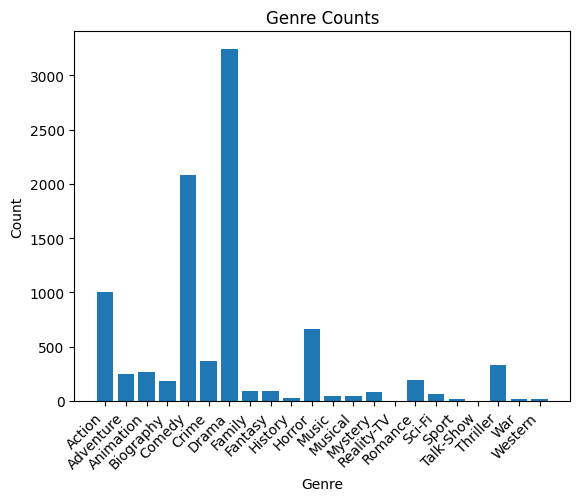

In [66]:
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.bar(df_merged['genre'], df_merged['count'])
plt.title('Genre Counts')

# Pre-Model 

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [68]:
data = movies_data.copy()

In [69]:
data

,movie_name,genre,imdb_rating
0,The Nun,Horror,5.300000
1,The Meg,Action,5.600000
2,Hereditary,Drama,7.300000
3,The Equalizer 2,Action,6.700000
4,Halloween,Crime,6.500000
...,...,...,...
9295,No maku bakuhai to,Drama,5.827089
9296,The 6th Kiss,Comedy,5.827089
9297,Alibaba Aur 41 Chor,Animation,5.827089
9298,Strong Artificial Intelligence,Action,7.200000


In [70]:
data['imdb_rating'] = data['imdb_rating'].round(1)

In [71]:
data

,movie_name,genre,imdb_rating
0,The Nun,Horror,5.3
1,The Meg,Action,5.6
2,Hereditary,Drama,7.3
3,The Equalizer 2,Action,6.7
4,Halloween,Crime,6.5
...,...,...,...
9295,No maku bakuhai to,Drama,5.8
9296,The 6th Kiss,Comedy,5.8
9297,Alibaba Aur 41 Chor,Animation,5.8
9298,Strong Artificial Intelligence,Action,7.2


In [72]:
X = data[['genre', 'imdb_rating']]
y = data['imdb_rating']

# Model Training

# Random Forest Regressor

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['genre']]).toarray()
X_test_encoded = encoder.transform(X_test[['genre']]).toarray()

In [75]:
model = RandomForestRegressor()
model.fit(X_train_encoded, y_train)

RandomForestRegressor()

In [76]:
y_pred = model.predict(X_test_encoded)

In [77]:
new_genre = "Drama"
new_genre_encoded = encoder.transform([[new_genre]])

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [78]:
predicted_rating = model.predict(new_genre_encoded)

In [79]:
rounded_rating = np.round(predicted_rating, 1)

In [80]:
print(f"Tentative rating for genre {new_genre}: {predicted_rating}")

Tentative rating for genre Drama: [6.10677396]


In [81]:
print(f"Tentative rating for genre {new_genre}: {rounded_rating[0]}")

Tentative rating for genre Drama: 6.1


In [82]:
def predict_rating_for_genre(new_genre):
    new_genre_encoded = encoder.transform([[new_genre]])
    predicted_rating = model.predict(new_genre_encoded)
    return round(predicted_rating[0], 1)

In [83]:
predict_rating_for_genre("Drama")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


6.1

In [84]:
predict_rating_for_genre("Action")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


5.6

In [85]:
predict_rating_for_genre("Thriller")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


5.5

In [86]:
predict_rating_for_genre("Comedy")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


5.8

In [87]:
predict_rating_for_genre("Animation")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


6.1

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 0.9142040503725672
MSE: 1.533086390281597
R-squared: 0.09489534242760256


In [89]:
'''import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(predict_rating_for_genre,file)'''

"import pickle\nwith open('random_forest_model.pkl', 'wb') as file:\n    pickle.dump(predict_rating_for_genre,file)"

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
X = data[['genre', 'imdb_rating']]
y = data['imdb_rating']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [93]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
y_pred = decision_tree_model.predict(X_test)

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Drama'

In [95]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1.0218808396191303
MSE: 1.8470880300778345
R-squared: -0.11215796419113788


In [96]:
def predict_rating_for_genre1(new_genre):
    new_genre_encoded = encoder.transform([[new_genre]])
    predicted_rating = model.predict(new_genre_encoded)
    return round(predicted_rating[0], 1)

In [97]:
predict_rating_for_genre1("Action")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


5.6

In [98]:
predict_rating_for_genre1("Drama")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


6.1

In [99]:
predict_rating_for_genre1("Animation")

c:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


6.1